In [1]:
using Plots
using ColorSchemes
using LaTeXStrings
using LinearAlgebra
using ControlSystemsBase
using BehavioralSystems

In [2]:
n = 3
m = 2
p = 1
q = m+p
sys = drss(n,m,p)

StateSpace{Discrete{Float64}, Float64}
A = 
 -0.06075952732140035  -0.18309880325591094  -0.20099057413848814
  0.3226511950259685    0.1803650995301575    0.3396751730082092
 -0.1657102295312417   -0.01470239417750846  -0.07702111729289389
B = 
 -0.0                -0.34064033798814247
  0.0                -1.413314057379894
 -0.825557937053805  -0.5245786725010501
C = 
 -0.3328908372594099  0.3983768423410311  0.6859592950794112
D = 
 0.0  -0.0

Sample Time: 1.0 (seconds)
Discrete-time state-space model

In [3]:
T = 10
Π = canonical_permutation(m,p,T)

ℬ_mb = ss2BT_modelbased(sys, nothing, T)
ℬ_1 = ℬ_mb[Π,:]
ℬ_2 = ss2BT_datadriven(sys, T)
ℬ_3 = ss2BT_hankel(sys, T)

30×23 Matrix{Float64}:
 -0.109998  -0.0844073   -0.0846498  …  -0.402688      0.0199275
 -0.158383  -0.295379     0.070916      -0.587181      0.0948083
  0.228325  -0.452098     0.0914501      0.186141      0.00564838
 -0.113208  -0.269321     0.138028       0.00397321    0.391679
 -0.155007   0.0668345    0.306647      -0.0108605     0.555873
  0.247316   0.163533     0.0205639  …  -0.671705     -0.115336
 -0.110045   0.326143     0.138541       0.0389267    -0.043018
 -0.155155   0.245393    -0.101384       0.00743199   -0.0579813
  0.251857   0.169719    -0.330903      -0.0103017     0.71057
 -0.114953   0.0209843   -0.273175       0.00760365   -0.00669735
  ⋮                                  ⋱                
 -0.115027   0.00494834  -0.0554754     -0.0115962     0.000784204
 -0.147575  -0.190086     0.0109047      0.0336665    -0.00375454
  0.255834   0.012245     0.336881       0.00968537   -0.000923968
 -0.11428    0.17783      0.0789956     -0.0237015     0.00183685
 -0.148536

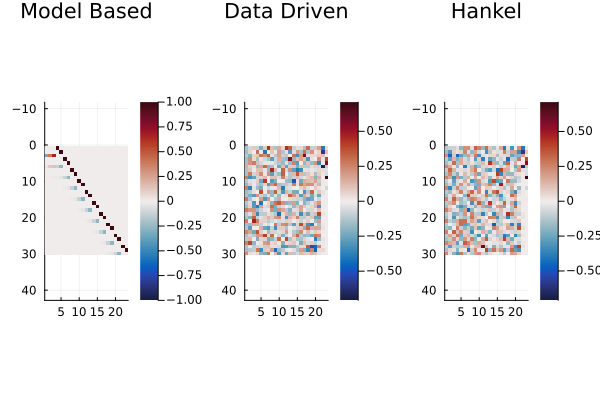

In [4]:
v1 = maximum(abs.(ℬ_1))
v2 = maximum(abs.(ℬ_2))
v3 = maximum(abs.(ℬ_3))
cmap = :balance
p1 = heatmap(ℬ_1, yflip=true, title="Model Based", 
color = cmap, clims=(-v1,v1), aspect_ratio=:equal)
p2 = heatmap(ℬ_2, yflip=true, title="Data Driven", 
color = cmap, clims=(-v2,v2), aspect_ratio=:equal)
p3 = heatmap(ℬ_3, yflip=true, title="Hankel", 
color = cmap, clims=(-v3,v3), aspect_ratio=:equal)
p_ = plot(p1, p2, p3, layout=(1,3))
savefig(p_, "ss2BT.pdf")
p_

In [5]:
rank(ℬ_1), rank(ℬ_2), rank(ℬ_3), T*m + n

(23, 23, 23, 23)

In [6]:
rank([ℬ_mb ℬ_2]), rank([ℬ_1 ℬ_3], atol=1e-10), rank([ℬ_1 ℬ_2], atol=1e-10), rank([ℬ_2 ℬ_3], atol=1e-10)

(30, 30, 30, 23)

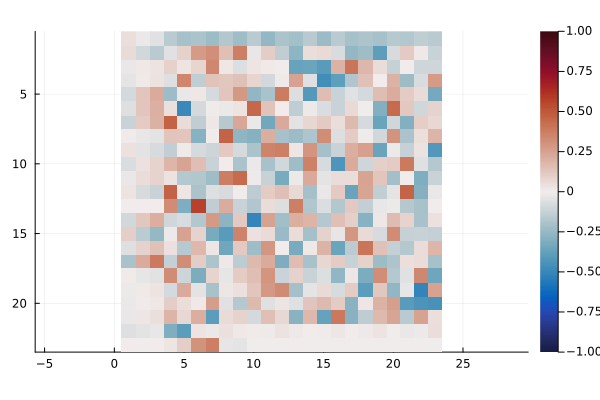

In [7]:
heatmap(ℬ_2' * ℬ_1, yflip=true, aspect_ratio=:equal, clims=(-1,1), color=cmap)

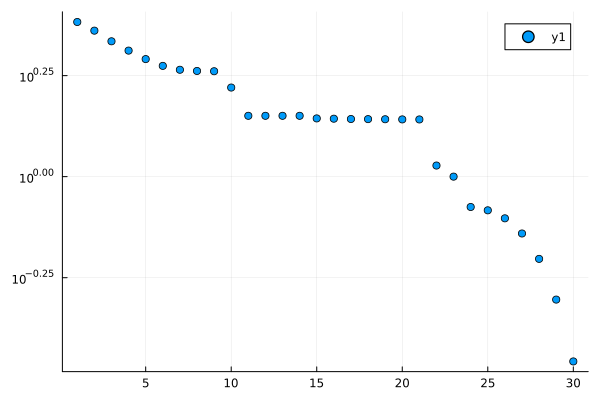

In [8]:
F = svd([ℬ_1 ℬ_2])
scatter(F.S, yscale=:log10)

In [7]:
BehavioralSystems._rank(F)

UndefVarError: UndefVarError: F not defined

In [8]:
d = zeros(T)
d_2 = zeros(T)
#d_3 = zeros(T)
w = random_trajectory(sys,5*T)
for t in 1:T
    d[t] = rank(ss2BT_modelbased(sys, nothing, t))
    d_2[t] = rank(ss2BT_hankel(w, t))
    #d_3[t] = rank(obsv(sys,t))
end

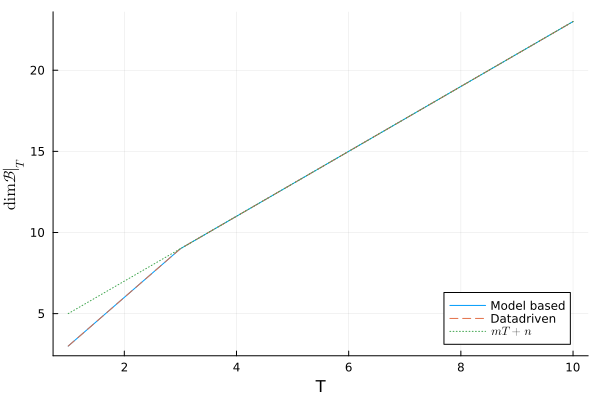

In [9]:
plot(d, 
label="Model based",
xlabel="T",
ylabel=L"\dim \mathcal{B}|_T",
)
#plot!(d_3, label="Observability Matrix")
plot!(d_2, label="Datadriven", linestyle=:dash)
plot!(1:10, n.+m.*(1:10), label=L"mT+n", linestyle=:dot)

In [10]:
lag_modelbased(sys), lag_datadriven(sys)

(3, 3)

In [11]:
w = random_trajectory(sys, 20)
ℓ = lag_datadriven(w)

3

In [12]:
R_mb = ss2r_modelbased(sys)
Π = canonical_permutation(m,p,ℓ+1)
R_1 = R_mb[:,Π]
R_2 = ss2r_datadriven(sys)

1×12 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0138837  0.0230249  -0.000869775  0.0694359  …  -3.98986e-17  0.699837

In [13]:
w_ = random_trajectory(sys, ℓ+1)
R_mb * vec(w_), R_1 * vec(w_), R_2 * vec(w_)

([0.914133726842083], [0.8771633851825711], [0.0])

In [14]:
complexity_datadriven(w)

(2, 3, 3)

In [24]:
complexity_mpum(w)

(m, n) = (2, 3)


(2, 3, 3)

In [23]:
most_powerful_unfalsified_model(w)

(m, n) = (2, 3)


1×12 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0138837  0.0230249  -0.000869775  …  3.84241e-16  1.40946e-16  0.699837

In [25]:
T_ = 20
T_d = (m+1)*T_ + n+1
w_d = random_trajectory(sys, T_d)
w = random_trajectory(sys, T_)
w_h, N = data_interpolation(w_d, w; kernel=true)
N

43×0 Matrix{Float64}

In [26]:
norm(w-w_h)

4.9728250154394856e-15

In [27]:
w_h_2 = data_interpolation(sys, w)
norm(w-w_h_2)

3.6148378242936506e-15

In [28]:
S = ones(size(w))
S[:,15:end] .= 0.0
w_h_3 = data_interpolation(w_d, w; S=S)
norm(w-w_h_3)


2.62507098330794

In [29]:
w_2 = w .+ 0.01*randn(size(w))
w_2h = data_interpolation(w_d, w_2)
norm(w-w_2), norm(w-w_2h)

(0.06393777561875648, 0.0498013704294621)

In [31]:
w_ini = w[:,1:10]
w_input = w[:,11:end]
w_input[m+1:end,:] .= 0.0 # erase the outputs

w_s = data_simulation(w_d, w_ini, w_input, p)

norm(w-w_s)

6.654231025147803e-15

In [39]:
imp = impulse(sys, 0:10)

ControlSystemsBase.SimResult{Array{Float64, 3}, UnitRange{Int64}, Array{Float64, 3}, Matrix{Float64}, StateSpace{Discrete{Float64}, Float64}}([0.0 -0.5662991405486411 … -1.3627391611757617e-10 -3.964189607804892e-9;;; 0.0 -0.8094751605005055 … -1.2752859671998168e-8 -8.0752230251651e-9], 0:10, [0.0 0.0 … 3.7074563478958184e-9 7.451590482218455e-9; 0.0 0.0 … -1.2051127144727433e-7 3.777027401409314e-9; 0.0 -0.825557937053805 … 7.15885103818285e-8 -4.356386281678692e-9;;; 0.0 -0.34064033798814247 … 3.363823512358291e-8 1.4870708880151195e-8; 0.0 -1.413314057379894 … -2.4798082021001476e-7 1.4275330109631673e-8; 0.0 -0.5245786725010501 … 1.4175012627734465e-7 -1.284604099845519e-8], [1.0 0.0 … 0.0 0.0], StateSpace{Discrete{Float64}, Float64}
A = 
 -0.06075952732140035  -0.18309880325591094  -0.20099057413848814
  0.3226511950259685    0.1803650995301575    0.3396751730082092
 -0.1657102295312417   -0.01470239417750846  -0.07702111729289389
B = 
 -0.0                -0.34064033798814247
  

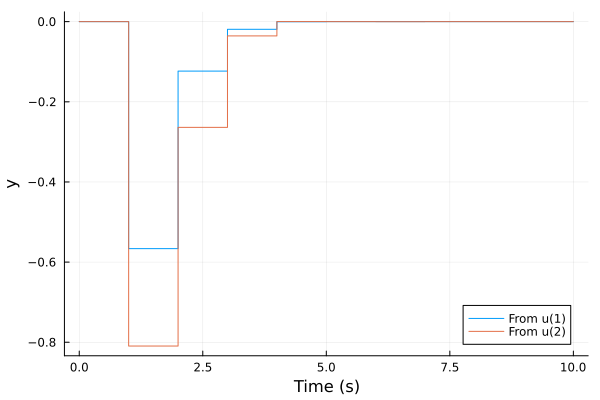

In [40]:
plot(imp)

In [41]:
imp.y

1×11×2 Array{Float64, 3}:
[:, :, 1] =
 0.0  -0.566299  -0.123333  -0.0190912  …  -1.36274e-10  -3.96419e-9

[:, :, 2] =
 0.0  -0.809475  -0.263764  -0.0355572  …  -1.27529e-8  -8.07522e-9

In [47]:
y_imp = impulse_response(sys, 11)

1×11×2 Array{Float64, 3}:
[:, :, 1] =
 -1.54489e-16  -0.566299  -0.123333  -0.0190912  …  -1.36274e-10  -3.96419e-9

[:, :, 2] =
 -7.33463e-17  -0.809475  -0.263764  -0.0355572  …  -1.27529e-8  -8.07522e-9

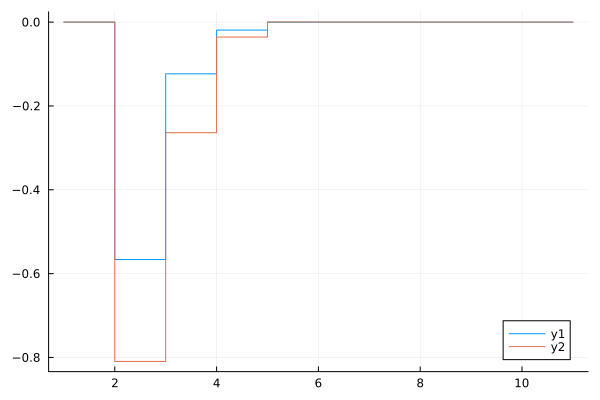

In [48]:
plot(y[1,:,:], lt= :steppost)

In [49]:
norm(y - imp.y)

1.4684766540114325e-14

In [50]:
stp = step(sys, 10)

ControlSystemsBase.SimResult{Array{Float64, 3}, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Array{Float64, 3}, Matrix{Float64}, StateSpace{Discrete{Float64}, Float64}}([0.0 -0.5662991405486411 … -0.7089144993764153 -0.7089145033406049;;; 0.0 -0.8094751605005055 … -1.1085083022770508 -1.1085083103522737], 0.0:1.0:10.0, [0.0 0.0 … 0.19378653153929037 0.19378653899088083; 0.0 0.0 … -0.25230756119092185 -0.2523075574138944; 0.0 -0.825557937053805 … -0.7928914339643629 -0.7928914383207493;;; 0.0 -0.34064033798814247 … 0.0943029161464124 0.09430293101712134; 0.0 -1.413314057379894 … -1.8844018498303803 -1.88440183555505; 0.0 -0.5245786725010501 … -0.4758499072313831 -0.4758499200774241], [1.0 1.0 … 1.0 1.0], StateSpace{Discrete{Float64}, Float64}
A = 
 -0.06075952732140035  -0.18309880325591094  -0.20099057413848814
  0.3226511950259685    0.1803650995301575    0.3396751730082092
 -0.1657102295312417   -0.01470239417750846  -0.07702111729289389
B

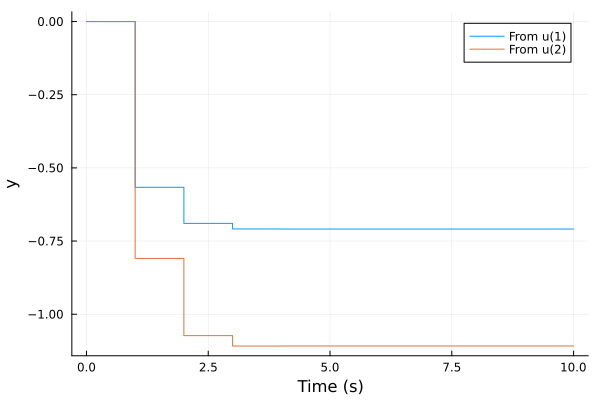

In [51]:
plot(stp)

In [54]:
y_step = step_response(sys, 11)

1×11×2 Array{Float64, 3}:
[:, :, 1] =
 -3.50216e-16  -0.566299  -0.689632  …  -0.708914  -0.708914  -0.708915

[:, :, 2] =
 5.00996e-16  -0.809475  -1.07324  -1.1088  …  -1.10851  -1.10851  -1.10851

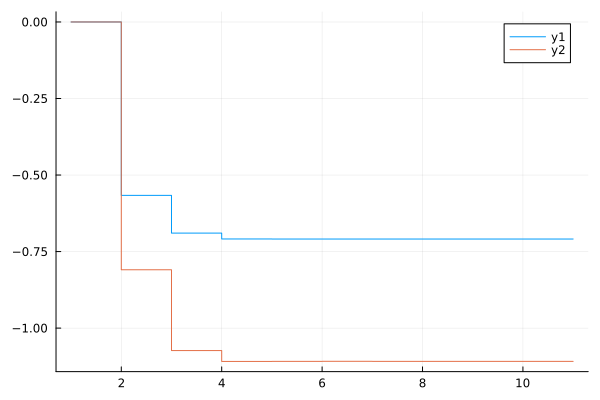

In [55]:
plot(y_step[1,:,:], lt= :steppost)

In [56]:
norm(y_step - stp.y)

2.0313839594158492e-14